<a href="https://colab.research.google.com/github/mpsanta/03MIAR---AlgoritmosOptimizacion---2023/blob/main/AlgoritmosOptimizacion_AG2_MagdaSanta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Guiada 2 de Algoritmos de Optimizacion

Nombre: MAGDA DEL PILAR SANTA FAJARDO

https://colab.research.google.com/drive/18j2zNtrJc8yvIMcuLu1X7hdLs08X6zej?usp=sharing

https://github.com/mpsanta/03MIAR---AlgoritmosOptimizacion---2023

https://github.com/mpsanta/03MIAR---AlgoritmosOptimizacion---2023/blob/main/AlgoritmosOptimizacion_AG2_MagdaSanta.ipynb
<br>




In [1]:
import math

##Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

###Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

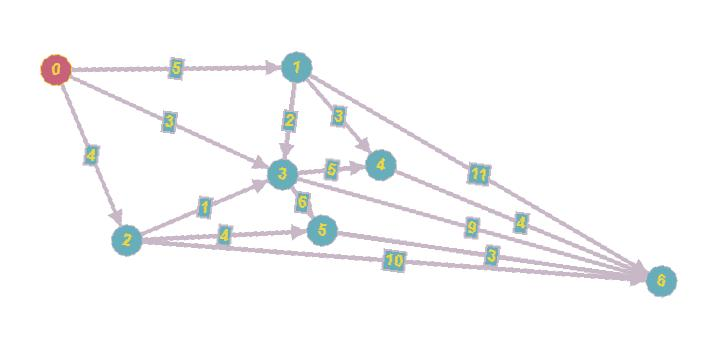

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima (modelado habitual para restricciones)

In [4]:
#Viaje por el rio - Programación dinámica

# Costos por pasar por cada nodo, la lista está en orden [n0,n1,n2,n3,n4,n5,n6]
TARIFAS = [
[0,5,4,3,999,999,999],   #desde nodo 0 #float ('inf') valor al infinito
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, 999, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [14]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro

def Precios(TARIFAS):

  #Total de Nodos
  N = len(TARIFAS[0])
  
  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  # La matriz se inicializa con 9999, es de nxn 
  RUTA = [ [""]*N for i in [""]*N] #Ruta se inicializa con nulos
  
  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1): #El nodo desde
    for j in range(i+1, N): #El nodo hasta
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i
      
      for k in range(i, j): #Calculos los transbordos o valores intermedios
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN
        
  return PRECIOS,RUTA

In [13]:
PRECIOS,RUTA = Precios(TARIFAS)  
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")  
for i in range(len(TARIFAS)):
  print(RUTA[i]) 

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [9]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde 
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta]) #Recursividad

Prueba1: Desde nodo 0 a 6

In [16]:
print("\nLa ruta es:") 

calcular_ruta(RUTA,0,6) 


La ruta es:


'0,2,5'

Prueba1: Desde nodo 0 a 4

In [18]:
print("\nLa ruta es:") 

calcular_ruta(RUTA,0,4) 


La ruta es:


'0,1'

##Ramificación y Poda.

Durante la exploración exhaustiva es posible eliminar definitivamente ramas del árbol que sabemos a ciencia cierta que no va a mejorar la solución encontrada.

En cada nodo se establece una cota para todas las soluciones alcanzables desde dicho nodo.

Si dicha cota resulta ser peor que la mejor solución alcanzada hasta el momento, entonces se decide no explorar diche rama y por lo tanto se poda.

Se debe establecer una pila para almacenar los nodos que aún no han sido explorados y determinar una función de coste para estimar en cada nodo una cota asociada.

##Problema: Asignacion de tareas

El problema consiste en maximizar el rendimiento (o minimizar los costes) en cuanto a la asignación de N tareas a N agentes. Cada tarea solo puede ser 
asignado a un agente. 

Los beneficios que se obtienen al realizar la tarea 1 por el agente A es 9. Ver diapositiva.

La matriz de beneficios es la que se muestra en la figura. Ver diapositiva.

Aplicando Ramificación y Poda, obtener la asignación que maximice los beneficios.

Se busca el beneficio más alto.




In [19]:
#Asignacion de tareas - Ramificación y Poda

#    T A R E A 
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40], #Matriz de costes iniciales
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]
        

In [27]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i] 
  return VALOR



valor((3,0, ),COSTES) #Asignación de tareas, se colocan los agentes. Los agentes van desde 0 a 3
                     #Tarea0 se asigna agente 3. Tarea1 se asigna agente 0
                     #Total es 17+12 

29

In [28]:
#Coste inferior para soluciones parciales

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [30]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [31]:
crear_hijos((0,1,) , 4) #Asigno a la tarea 1 el agente 0

[{'s': (0, 1, 2)}, {'s': (0, 1, 3)}]

In [38]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)  
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0: 
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL
 
    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos 
    NODOS.extend(HIJOS) 

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ] 

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )
 

Prueba:

In [39]:
ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4
